# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: www.kaggle.com/jealousleopard/goodreadsbooks

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

### **I am proposing a business inquiry as an employee of a library. Many people come to the library looking for a new book to read and want to know which are popular and highly rated by others. I want to be able to provide a tool that will allow visitors to see ratings of books and which authors have an overall high rating. I chose to use data from Goodreads. Although Goodreads is subjective and not a foolproof indicator of quality, it's a good place to start. Once the visitor finds a book they might be interested in, they can refer back to the more elaborate written reviews on the Goodreads website.**

When I first read the csv file, I got this message:
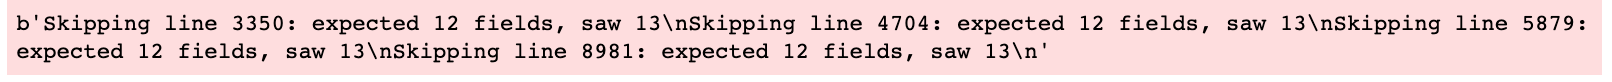
When I checked the csv file, I noticed the error was because one of the column value overlapped to a new column, creating an extra column.
So I manually fixed the 4 errors on the actual csv file and read the file again:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv("books.csv", error_bad_lines=False)

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [2]:
# Finding the number of rows and columns
print("Dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

Dataset contains 11127 rows and 12 columns


### Columns Description:
**bookID** - a unique ID for each book<br>
**title** - the name under which the book was published.<br>
**authors** - contains the authors of the particular book<br>
**average_rating** - the average rating of the books, as decided by the users<br>
**isbn** - unique number to identify the book, the International Standard Book Number<br>
**isbn13** - the new format for ISBN, implemented in 2007 - 13 digits<br>
**language_code** - the primary language of the book (Ex. eng is standard for English)<br>
**num_pages** - the number of pages for the book<br>
**ratings_count** - the number of ratings given for the book<br>
**text_reviews_count** - total number of written text reviews the book received<br>
**publication_date** - date when the book was first published<br>
**publisher** - name of the publisher<br>

In [3]:
# Checking the first 5 rows to get a glimpse of what the dataframe looks like
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/06,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,9/1/04,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,11/1/03,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,5/1/04,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/04,Scholastic


In [4]:
# Looking at the last 5 rows
df.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.781560e+12,eng,512,156,20,12/21/04,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.780140e+12,eng,635,783,56,12/1/88,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.780140e+12,eng,415,820,95,8/1/93,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.780060e+12,eng,434,769,139,2/27/07,Ecco
11126,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9.788500e+12,spa,272,113,12,5/28/06,Edimat Libros



Just by seeing the first and last 5 rows, I noticed these things:
1) On the publisher column there's both 'Scholastic Inc.' and 'Scholastic' which are the same thing <br>
2) On the author column, there's both 'J.K. Rowling' and 'J.K. Rowling/Mary GrandPré' which includes the illustrator <br>
3) On the author column, I noticed that it might also include the editors names
****

In [5]:
# How many nulls?
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [6]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  float64
 6   language_code       11127 non-null  object 
 7     num_pages         11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.0+ MB


In [7]:
# Checking for duplicates
dup = df[df.duplicated(keep=False)]
dup

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher


In [8]:
# Selecting duplicate rows based on the title column
dup_title = df[df.duplicated(['title'])]
dup_title.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10,16,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams/Stephen Fry,4.22,739322206,9.780740e+12,eng,6,1266,253,3/23/05,Random House Audio
24,35,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien/Alan Lee,4.50,618260587,9.780620e+12,en-US,1216,1618,140,10/1/02,Houghton Mifflin Harcourt
37,63,The Changeling,Kate Horsley,3.55,1590301943,9.781590e+12,eng,339,301,43,4/12/05,Shambhala
40,68,The Known World,Edward P. Jones/Kevin R. Free,3.83,006076273X,9.780060e+12,en-US,14,55,12,6/15/04,HarperAudio
41,69,The Known World,Edward P. Jones,3.83,60749911,9.780060e+12,eng,576,22,3,6/15/04,Harper


^^^ **Noticed that there were duplicate titles because there could be several publishers for the same book and some duplicates are for 'audiobooks'**<br>
********

In [9]:
# Checking to see how many different type of languages are listed
df['language_code'].value_counts()

eng      8911
en-US    1409
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
lat         3
enm         3
rus         2
swe         2
glg         1
wel         1
msa         1
ale         1
nl          1
tur         1
srp         1
ara         1
gla         1
nor         1
Name: language_code, dtype: int64

^^^ **Noticed that there was regular 'eng' and specific type of English: American (en-US), Canadian (en-CA), British (en-GB)**
*****

In [10]:
# Checking to see how many different publishers are listed and which is most common
df['publisher'].value_counts()

Vintage                           318
Penguin Books                     261
Penguin Classics                  184
Mariner Books                     150
Ballantine Books                  144
                                 ... 
Disinformation Books                1
Council Oak Books                   1
Ravensburger Buchverlag             1
The Modern Library                  1
Kregel Academic & Professional      1
Name: publisher, Length: 2292, dtype: int64

In [11]:
# Checking which titles are repeated the most
df['title'].value_counts().head(15)

The Iliad                     9
The Brothers Karamazov        9
'Salem's Lot                  8
Anna Karenina                 8
The Odyssey                   8
Gulliver's Travels            8
A Midsummer Night's Dream     7
The Picture of Dorian Gray    7
The Great Gatsby              6
Sense and Sensibility         6
Collected Stories             6
Macbeth                       6
Romeo and Juliet              6
Robinson Crusoe               6
Jane Eyre                     6
Name: title, dtype: int64

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

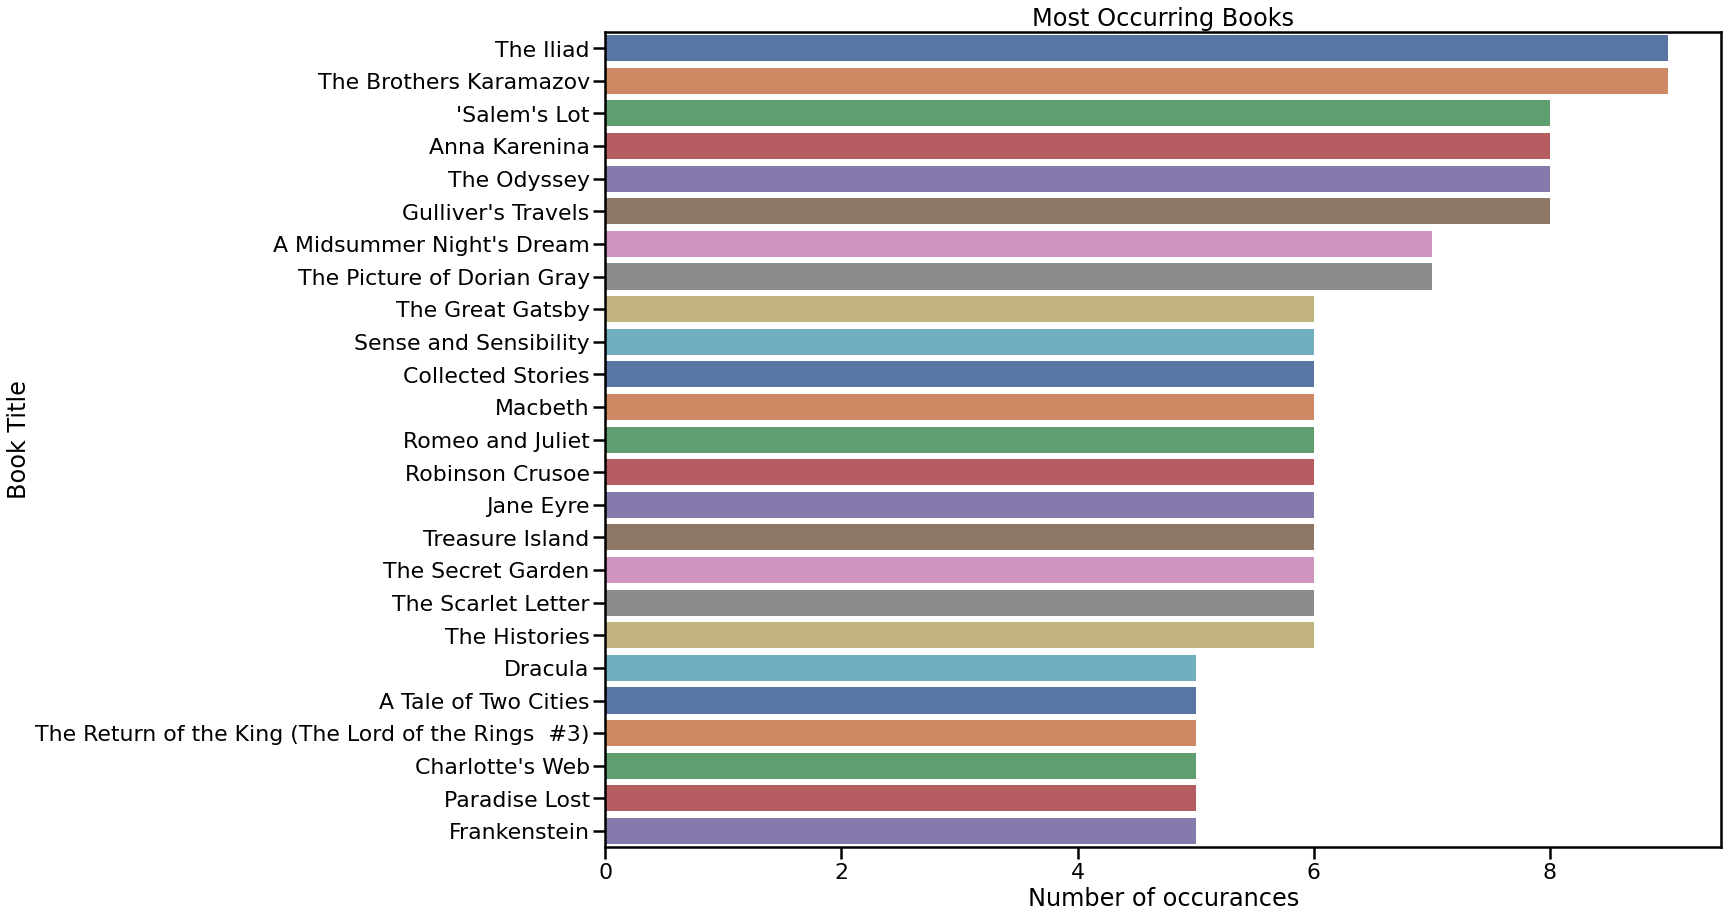

In [12]:
# Which are the books with most occurances in the list?
sns.set_context('poster')
plt.figure(figsize=(20,15))
books = df['title'].value_counts()[:25]
sns.barplot(x = books, y = books.index, palette='deep')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Book Title")
plt.show()

^^^ **Based on the graph above, we can see that many of the classic titles are the most occuring titles in this data. They have several publication editions. Almost all of these titles are books that are assigned in school.**
*****

<AxesSubplot:xlabel='ratings_count', ylabel='title'>

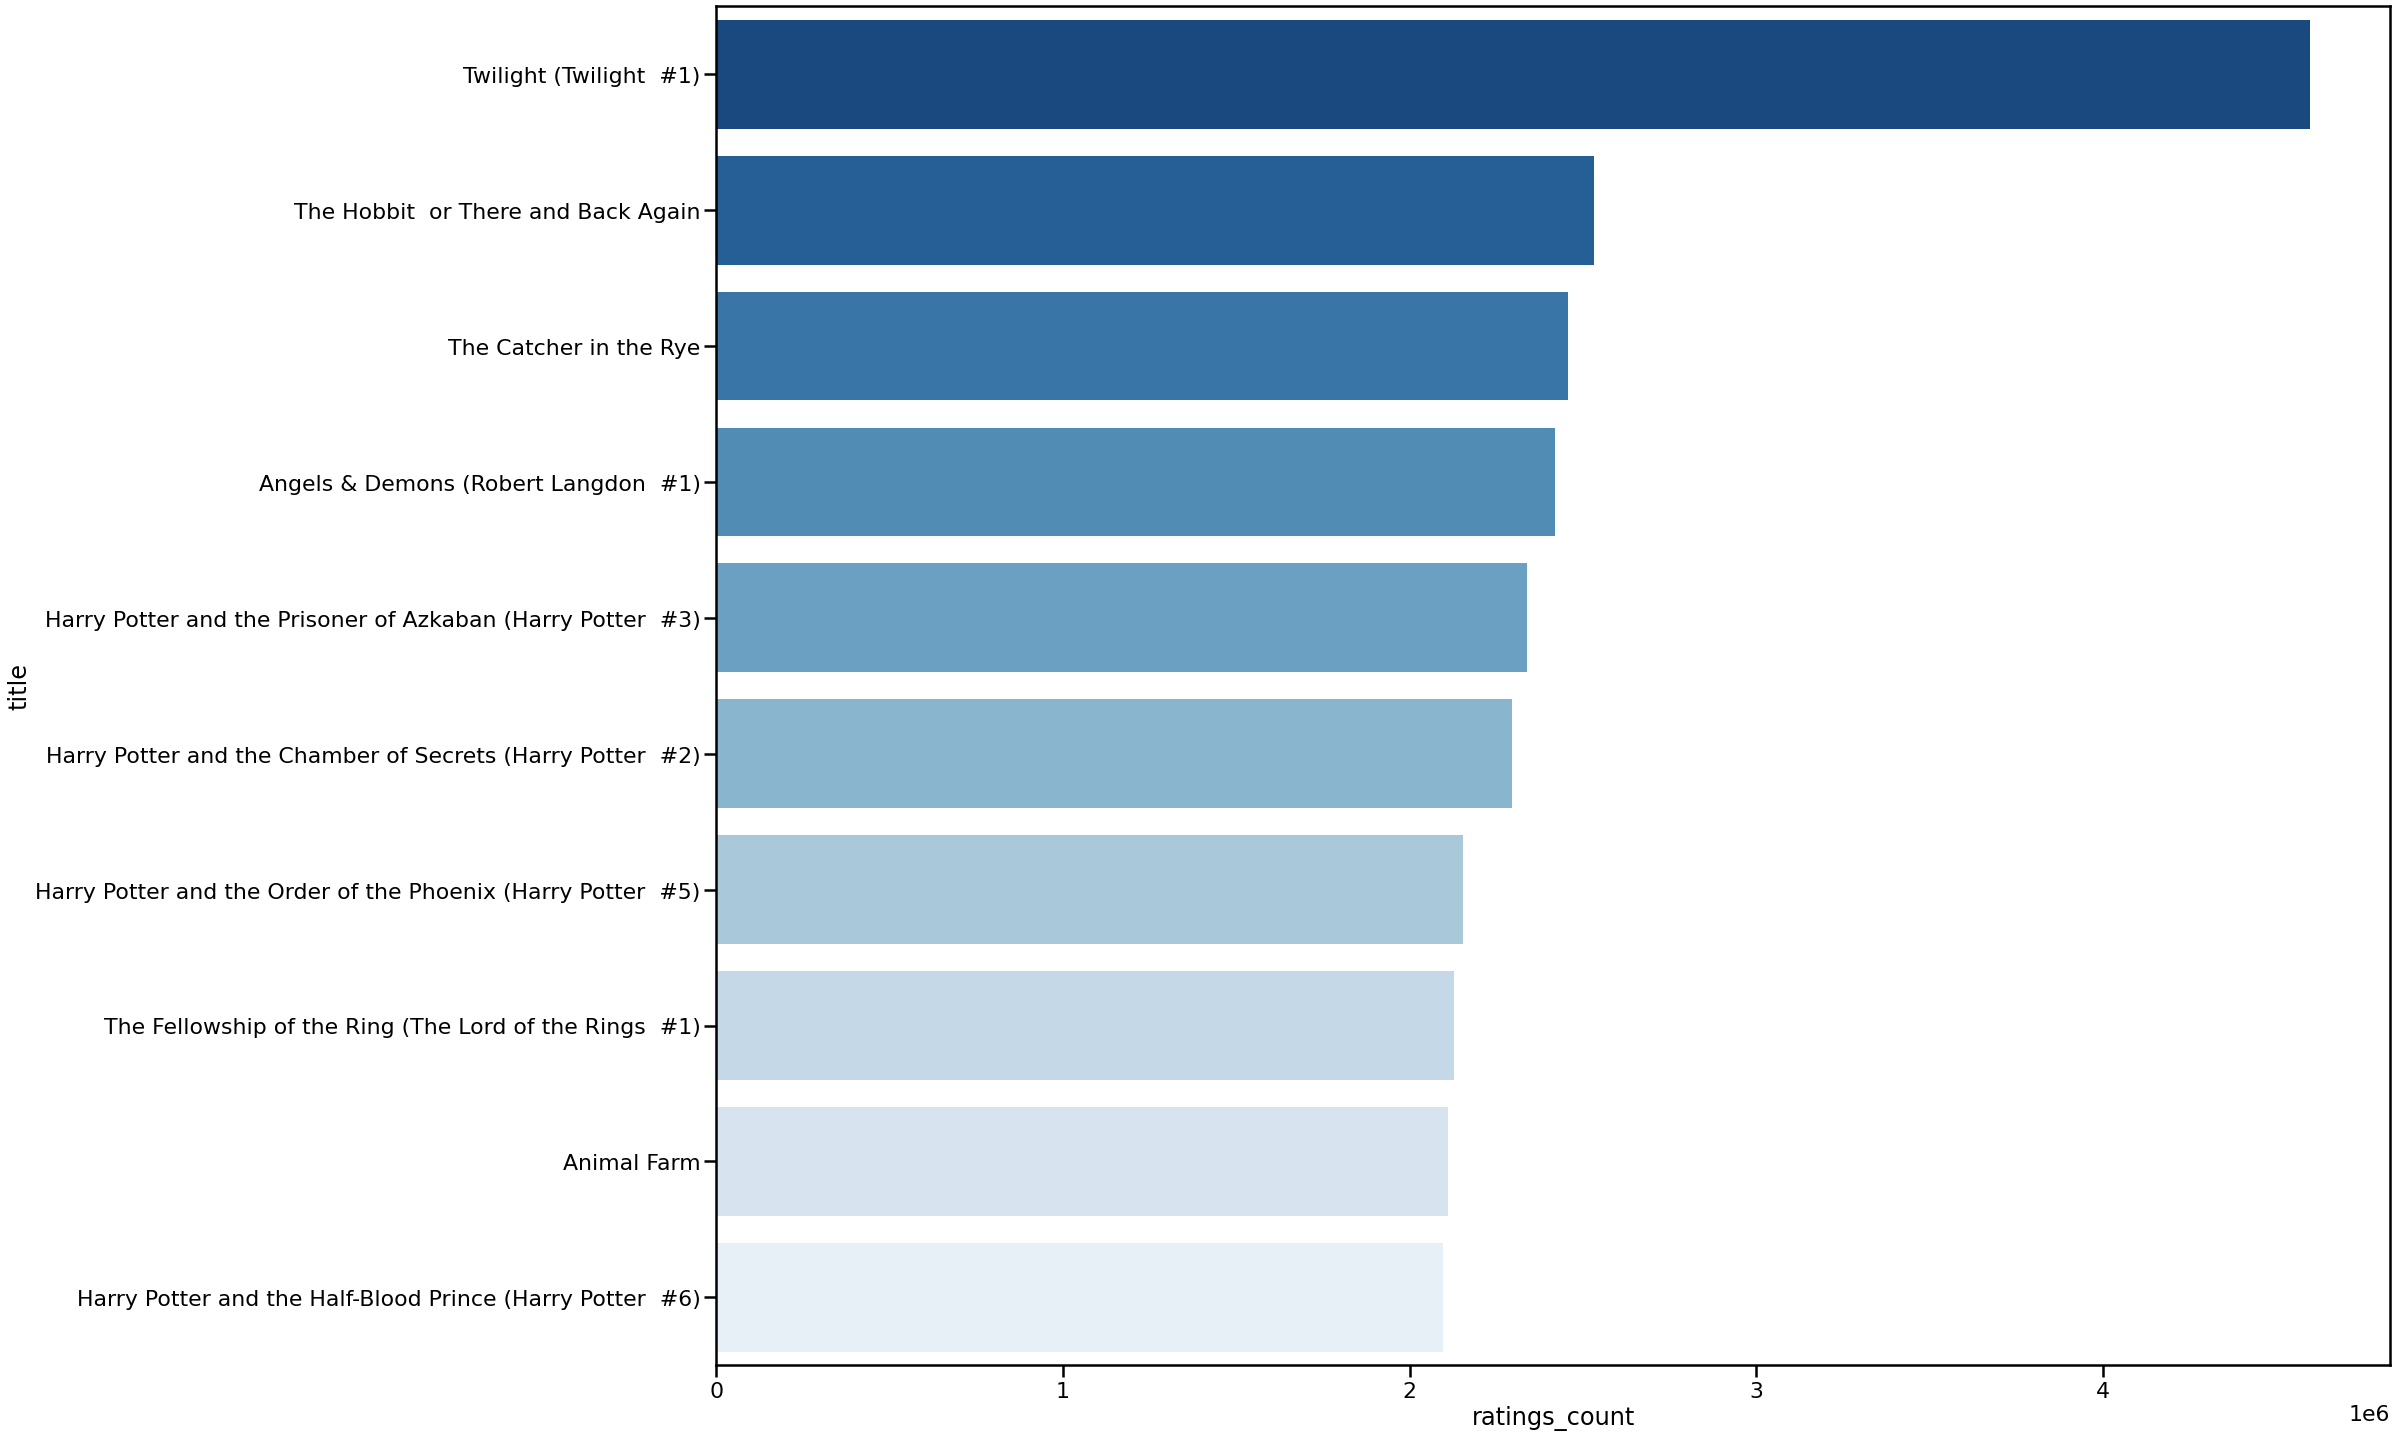

In [13]:
# Which are the top 10 most rated books?
most_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(30,25))
sns.barplot(x = most_rated['ratings_count'], y = most_rated.index, palette='Blues_r')

^^^ **Based on the graph above, we can see that Twilight has the most number of ratings (over 4 million).**
*****

## Summarize Your Results

With your EDA complete, answer the following questions.

**1. Was there anything surprising about your dataset?**<br>
I didn't realize that there would be duplicate titles because of different publishers. <br><br>
**2. Do you have any concerns about your dataset?**<br>
No immediate concerns, I just hope much of the data is correct.<br>Harry Potter #1 Sorcerer's Stone has over 8 million rating counts on Goodreads but isn't showing up on the data.<br><br>
**3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data?**<br> Definetely want to fix the inconsistencies on the author and publisher column<br>